In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Exploratory Data Analysis (EDA) on Preprocessed Data

This notebook performs exploratory data analysis (EDA) on the preprocessed dataset from the L2-ARCTIC corpus. This EDA will examine key characteristics, including speaker distribution, utterance lengths, phoneme frequency, error label distribution.

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set global plotting style for consistency
sns.set(style="whitegrid", font_scale=1.2)

### Load Preprocessed Data

In this cell, it loads the preprocessed dataset. The JSON file contains entries with keys such as `speaker_id`, `file_id`, `features`, `actual_phonemes`, `canonical_phonemes`, and `error_labels`.


In [3]:
data_path = "/content/drive/MyDrive/IRP/Implementation_New/New/preprocessed_data/train_data.json"
with open(data_path, "r", encoding="utf-8") as f:
    data_entries = json.load(f)

print(f"Total number of entries loaded: {len(data_entries)}")

Total number of entries loaded: 21493


### Create a DataFrame for Basic Statistics

Here, it constructs a DataFrame that summarizes key metrics for each entry, such as the number of frames, and the counts of actual and canonical phonemes. This will give inspection of the dataset's properties.

In [6]:
records = []
for entry in data_entries:
    records.append({
        "speaker_id": entry["speaker_id"],
        "file_id": entry["file_id"],
        "num_frames": len(entry["features"]),
        "num_actual_phonemes": len(entry["actual_phonemes"]),
        "num_canonical_phonemes": len(entry["canonical_phonemes"]),
        "num_error_labels": len(entry["error_labels"])
    })
df = pd.DataFrame(records)

In [7]:
print("DataFrame Head:")
df.head()

DataFrame Head:


,speaker_id,file_id,num_frames,num_actual_phonemes,num_canonical_phonemes,num_error_labels
0,ERMS,ERMS_arctic_a0545,91,35,36,36
1,ERMS,ERMS_arctic_a0011,118,32,32,32
2,LXC,LXC_arctic_b0234,156,34,34,34
3,MBMPS,MBMPS_arctic_a0229,97,23,23,23
4,MBMPS,MBMPS_arctic_b0469,109,35,34,34


In [8]:
print("\nBasic Statistics:")
df.describe()


Basic Statistics:


,num_frames,num_actual_phonemes,num_canonical_phonemes,num_error_labels
count,21493.000000,21493.000000,21493.000000,21493.000000
mean,113.908296,31.596845,31.768995,31.768995
std,40.340571,10.204105,10.270468,10.270468
min,22.000000,5.000000,5.000000,5.000000
25%,84.000000,24.000000,24.000000,24.000000
50%,110.000000,31.000000,31.000000,31.000000
75%,139.000000,39.000000,39.000000,39.000000
max,378.000000,71.000000,70.000000,70.000000


### Utterance Length Distribution

This visualize the distribution of utterance lengths (number of frames) to understand the variability of the audio segments across the dataset.


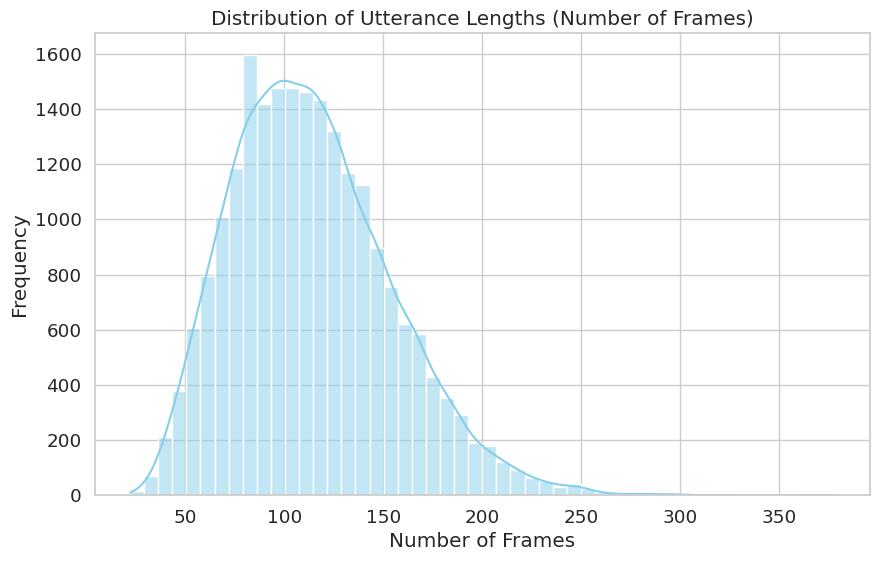

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(df['num_frames'], bins=50, kde=True, color="skyblue")
plt.title("Distribution of Utterance Lengths (Number of Frames)")
plt.xlabel("Number of Frames")
plt.ylabel("Frequency")
plt.show()

### Phoneme Count Distribution

This section displays the distribution of phoneme counts for both actual and canonical phoneme sequences. Comparing these distributions helps us verify consistency between the expected and observed pronunciations.

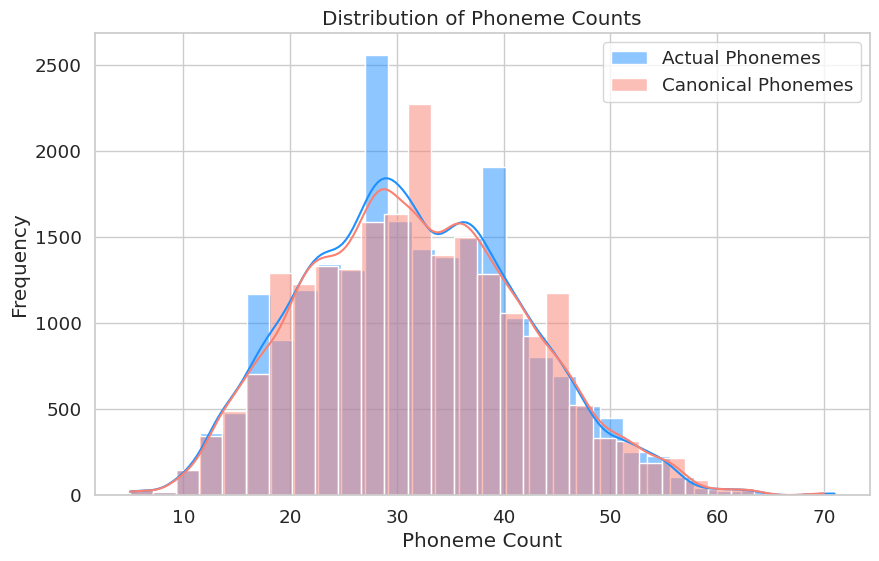

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(df['num_actual_phonemes'], bins=30, kde=True, color="dodgerblue", label="Actual Phonemes")
sns.histplot(df['num_canonical_phonemes'], bins=30, kde=True, color="salmon", label="Canonical Phonemes")
plt.title("Distribution of Phoneme Counts")
plt.xlabel("Phoneme Count")
plt.ylabel("Frequency")
plt.legend()
plt.show()

### Error Label Distribution

 This analyze the distribution of error labels across the dataset. According to our mapping, the labels are: Correct = 0, Substituted = 1, and Deleted = 2. This plot will help to understand the overall balance of error types in dataset.

Overall Error Label Distribution:
{'Correct': 654611, 'Substituted': 22865, 'Deleted': 5335}


<ipython-input-12-3598226b706f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Error Type", y="Count", data=df_errors, palette="viridis")


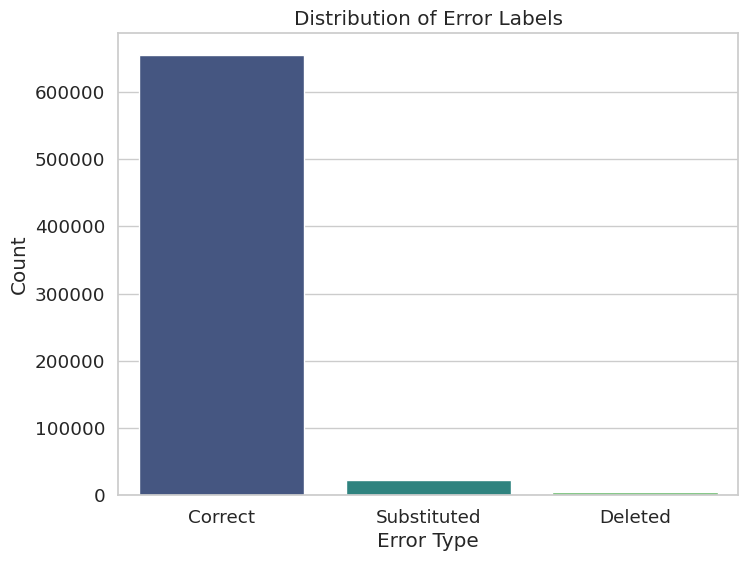

In [12]:
# Aggregate error label counts
error_counts = {"Correct": 0, "Substituted": 0, "Deleted": 0}
for entry in data_entries:
    for label in entry["error_labels"]:
        if label == 0:
            error_counts["Correct"] += 1
        elif label == 1:
            error_counts["Substituted"] += 1
        elif label == 2:
            error_counts["Deleted"] += 1

print("Overall Error Label Distribution:")
print(error_counts)

df_errors = pd.DataFrame(list(error_counts.items()), columns=["Error Type", "Count"])
plt.figure(figsize=(8,6))
sns.barplot(x="Error Type", y="Count", data=df_errors, palette="viridis")
plt.title("Distribution of Error Labels")
plt.xlabel("Error Type")
plt.ylabel("Count")
plt.show()

### Phoneme Frequency Distribution

This part of the analysis compiles the frequency of individual phonemes across all entries, combining information from both actual and canonical phoneme sequences. Understanding the frequency of each phoneme can indicate whether certain phonemes are underrepresented or if the dataset aligns with the expected 39-phone ARPAbet set from L2-ARCTIC.

<ipython-input-13-fac9fc75f581>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Phoneme", y="Count", data=df_phonemes, palette="magma")


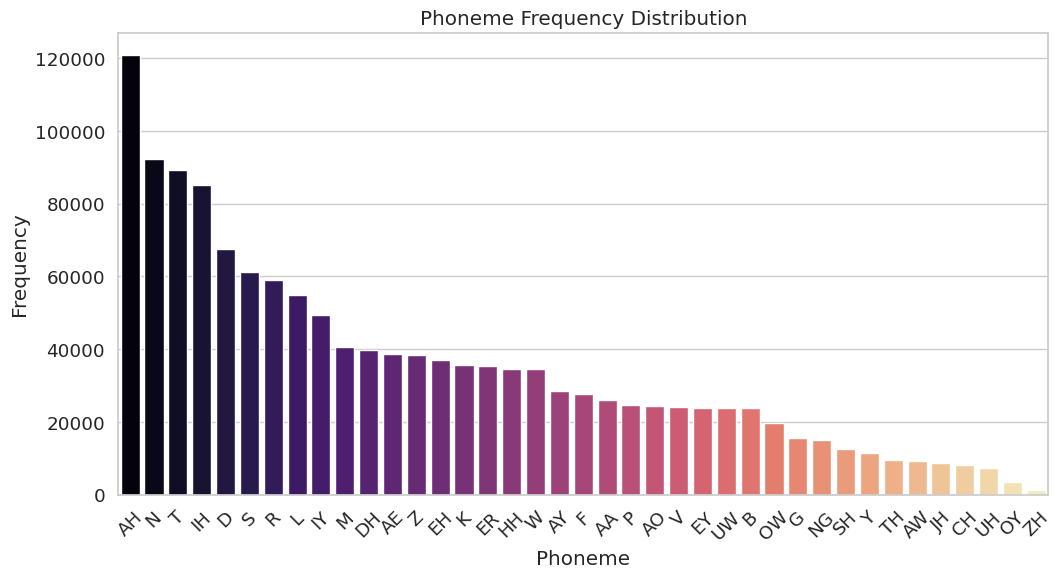

In [13]:
phoneme_counter = Counter()
for entry in data_entries:
    phoneme_counter.update(entry["actual_phonemes"])
    phoneme_counter.update(entry["canonical_phonemes"])

df_phonemes = pd.DataFrame(list(phoneme_counter.items()), columns=["Phoneme", "Count"])
df_phonemes = df_phonemes.sort_values("Count", ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x="Phoneme", y="Count", data=df_phonemes, palette="magma")
plt.title("Phoneme Frequency Distribution")
plt.xlabel("Phoneme")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()